In [159]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
import statistics

In [157]:
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
def max_length(lines):
	return max(len(line.split()) for line in lines)
def avg_length(lines):
	total = sum(len(line.split()) for line in lines)
	length = len(lines)
	return total/length



In [125]:
# The code was removed by Watson Studio for sharing.

(363386, 3)


<ipython-input-125-397196f0a0c7>:68: FutureWarning: The default value of regex will change from True to False in a future version.
  df1 = df1.apply(lambda x: x.astype(str).str.replace(r'[^\w\s]+', ''))


  English       Russian
0      go          марш
1      go           иди
2      go         идите
3      hi  здравствуйте
4      hi        привет


In [130]:
# t_df for "Translation dataframe." The propaganda dataframe mentioned later in this noteboook will be called p_df,
# and the non-propaganda dataframe will be called np_pdf.
t_df = df1
print("Max number of words in a row of the English column: " + str(max_length(t_df["English"])))
print("Max number of words in a row of the Russian column: " + str(max_length(t_df["Russian"])))
print(max_length)

Max number of words in a row of the English column: 101
Max number of words in a row of the Russian column: 80
<function max_length at 0x7f8d911999d0>


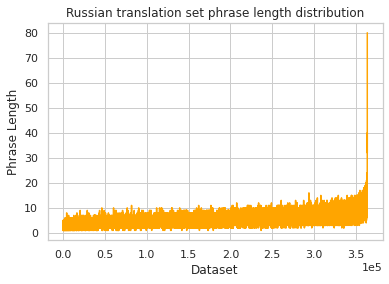

In [179]:
x = t_df["Russian"].index
y = t_df["Russian"].apply(lambda x: len(x.split()))
plt.title("Russian translation set phrase length distribution")
plt.xlabel('Dataset') 
plt.ylabel('Phrase Length')
plt.plot(x, y, color = "orange")
plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))


In [ ]:
# Plot of bucketed word length. The goal is to train the translation model as much as is needed, but not more. 
# If you look below, the maximum phrase length is 15 words. As a result, it's not necessary to train the model
# on any sentence surpassing fifteen words. 

(array([8.8000e+02, 1.7839e+04, 5.3919e+04, 7.7584e+04, 7.4687e+04,
        5.7345e+04, 3.6862e+04, 2.0755e+04, 1.1101e+04, 5.8360e+03,
        2.9170e+03, 1.4910e+03, 8.9100e+02, 4.7500e+02, 2.8800e+02,
        1.8300e+02, 1.1700e+02, 6.8000e+01, 4.5000e+01, 3.1000e+01,
        2.6000e+01, 1.3000e+01, 9.0000e+00, 6.0000e+00, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

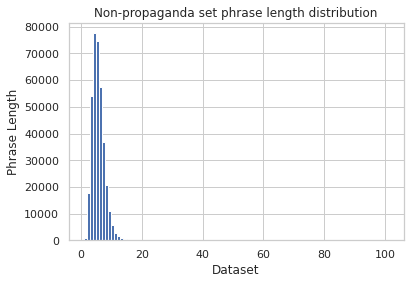

In [142]:
x = t_df["Russian"].index
y = t_df["Russian"].apply(lambda x: len(x.split()))
plt.title("Non-propaganda set phrase length distribution")
plt.xlabel('Dataset') 
plt.ylabel('Phrase Length')
plt.hist(y, bins = [i for i in range(1, 81)])

(array([  880., 17839., 53919., 77584., 74687., 57345., 36862., 20755.,
        11101.,  5836.,  2917.,  1491.,  1366.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 13 artists>)

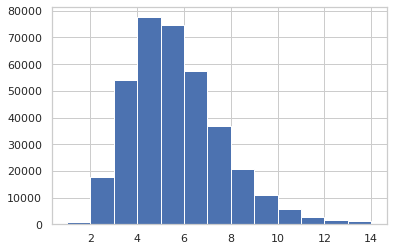

In [145]:
# As we can see, although the max Russian length is 80, they are very few and far between. Let's change the window to get a better view.
plt.hist(y, bins = [i for i in range(1, 15)])

In [162]:
# Let's print out some summary statistics. 
print("Average phrase length in translation dataset: " + str(avg_length(t_df["Russian"])))
print("Median phrase length in translation dataset: " + str(statistics.median(len(line.split()) for line in t_df["Russian"])))

Average word length in translation dataset: 5.202217476732731
Median word length in translation dataset: 5.0


In [45]:

body = client_c29a7a805d8d4196b70668aaf704d0e0.get_object(Bucket='default-donotdelete-pr-f13vke2upogt8x',Key='not propaganda.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Phrases
0,Одеяло Убежало
1,Улетела простыня
2,И подушка
3,Как лягушка
4,Ускакала от меня


In [46]:
# To lower.
df_data_2['Phrases'] = df_data_2['Phrases'].str.lower()
# Get rid of numbers.
df_data_2['Phrases'] = df_data_2['Phrases'].str.replace('\d+', '')
# Get rid of non-Cyrillic characters. 
df_data_2['Phrases'] = df_data_2['Phrases'].str.replace(r'[^\w\s]+', '')
# Get rid of leading and trailing whitespace. 
df_data_2['Phrases'] = df_data_2['Phrases'].str.strip()
# Get rid of duplicate entries. 
df_data_2 = df_data_2.drop_duplicates(subset=None, keep='first', inplace=False)
# Reset index. 
df_data_2 = df_data_2.reset_index()
df_data_2 = df_data_2.drop(columns = ['index'])
# This dataset has 799 entries, the other one has 1049. Let's cut them both to 750, so they're both the same size.
df_data_2 = df_data_2.head(750)
df_data_2.tail()


<ipython-input-46-d3550a336e82>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data_2['Phrases'] = df_data_2['Phrases'].str.replace('\d+', '')
<ipython-input-46-d3550a336e82>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data_2['Phrases'] = df_data_2['Phrases'].str.replace(r'[^\w\s]+', '')


,Phrases
745,и снова медведь
746,спасите моржа
747,вчера проглотил он морского ежа
748,и такая дребедень целый день
749,диньдилень


In [47]:

body = client_c29a7a805d8d4196b70668aaf704d0e0.get_object(Bucket='default-donotdelete-pr-f13vke2upogt8x',Key='propaganda.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()

,Phrases
0,Это первая советская фабрика чая
1,"Она находится в совхозе „Чаква"""
2,Чаква
3,станция закавказской железной дороги
4,Молодые листья чая


In [48]:
df_data_3['Phrases'] = df_data_3['Phrases'].str.lower()
df_data_3['Phrases'] = df_data_3['Phrases'].str.replace('\d+', '')
df_data_3['Phrases'] = df_data_3['Phrases'].str.replace(r'[^\w\s]+', '')
df_data_3['Phrases'] = df_data_3['Phrases'].str.strip()
df_data_3 = df_data_3.drop_duplicates(subset=None, keep='first', inplace=False)
df_data_3 = df_data_3.reset_index()
df_data_3 = df_data_3.drop(columns = ['index'])
df_data_3 = df_data_3.head(750)
df_data_3.tail()


<ipython-input-48-9b26b1598870>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data_3['Phrases'] = df_data_3['Phrases'].str.replace('\d+', '')
<ipython-input-48-9b26b1598870>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data_3['Phrases'] = df_data_3['Phrases'].str.replace(r'[^\w\s]+', '')


,Phrases
745,и снова медведь
746,спасите моржа
747,вчера проглотил он морского ежа
748,и такая дребедень целый день
749,диньдилень


In [49]:
# Assign propaganda and nonpropaganda datasets to more recognizable variable names.
np_df = df_data_2
p_df = df_data_3


In [52]:
np_tokenizer = create_tokenizer(np_df["Phrases"])
np_vocab_size = len(np_tokenizer.word_index) + 1
np_length = max_length(np_df['Phrases'])

In [53]:
p_tokenizer = create_tokenizer(p_df["Phrases"])
p_vocab_size = len(p_tokenizer.word_index) + 1
p_length = max_length(p_df['Phrases'])

In [58]:
print("Number of unique words in the propaganda dataset: " + str(p_vocab_size))

Number of unique words in the propaganda dataset: 1448


In [57]:
print("Number of unique words in the non-propaganda dataset: " + str(np_vocab_size))

Number of unique words in the non-propaganda dataset: 1178


In [59]:
print("Max length of phrase in propaganda dataset: " + str(p_length))

Max length of phrase in propaganda dataset: 15


In [60]:
print("Max length of phrase in non-propaganda dataset: " + str(np_length))

Max length of phrase in non-propaganda dataset: 14


In [ ]:
# This data is near-ideal. They both have comparable maximum values, and comparable vocab sizes. 

In [ ]:
# Let's do some graphs. I'll be using seaborn for visualization purposes. 

In [61]:
!pip install seaborn


In [74]:
sns.set_theme(style="whitegrid")

<BarContainer object of 2 artists>

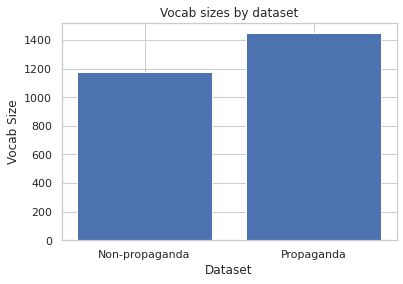

In [83]:
x = ["Non-propaganda", "Propaganda"]
y = [np_vocab_size, p_vocab_size]
plt.title("Vocab sizes by dataset")
plt.xlabel('Dataset') 
plt.ylabel('Vocab Size')
plt.bar(x, y)

<BarContainer object of 2 artists>

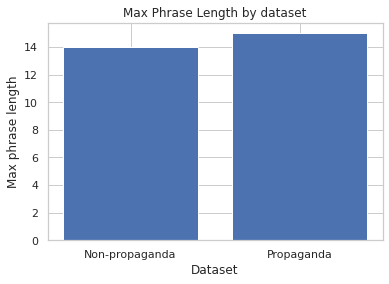

In [111]:
x = ["Non-propaganda", "Propaganda"]
y = [np_length, p_length]
plt.title("Max Phrase Length by dataset")
plt.xlabel('Dataset') 
plt.ylabel('Max phrase length')
plt.bar(x, y)

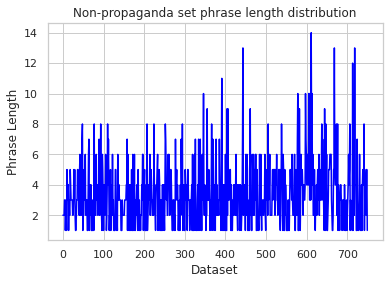

In [120]:
x = np_df["Phrases"].index
y = np_df["Phrases"].apply(lambda x: len(x.split()))
plt.title("Non-propaganda set phrase length distribution")
plt.xlabel('Dataset') 
plt.ylabel('Phrase Length')
plt.plot(x, y, color = "blue")

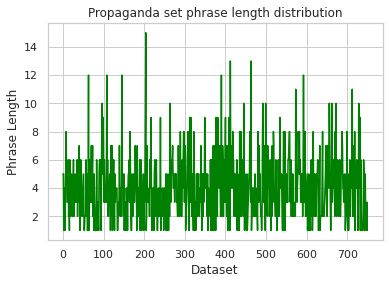

In [133]:
x = p_df["Phrases"].index
y = p_df["Phrases"].apply(lambda x: len(x.split()))
plt.title("Propaganda set phrase length distribution")
plt.xlabel('Dataset') 
plt.ylabel('Phrase Length')
plt.plot(x, y, color = "green")

In [183]:
print("Average phrase length in propaganda dataset: " + str(avg_length(p_df["Phrases"])))
print("Median phrase length in propaganda dataset: " + str(statistics.median(len(line.split()) for line in p_df["Phrases"])))

Average phrase length in propaganda dataset: 4.001333333333333
Median phrase length in propaganda dataset: 4.0


In [184]:
print("Average phrase length in non-propaganda dataset: " + str(avg_length(np_df["Phrases"])))
print("Median phrase length in non-propaganda dataset: " + str(statistics.median(len(line.split()) for line in np_df["Phrases"])))


Average phrase length in non-propaganda dataset: 3.3746666666666667
Median phrase length in non-propaganda dataset: 3.0


In [ ]:
# So there's a smaller vocabulary set and shorter phrases in my non-propaganda dataset. 

In [188]:
print("Average phrase length in translation dataset: " + str(avg_length(t_df["Russian"][120000:192000])))
print("Median phrase length in translation dataset: " + str(statistics.median(len(line.split()) for line in t_df["Russian"][120000:192000])))


Average phrase length in translation dataset: 4.747361111111111
Median phrase length in translation dataset: 5.0


In [ ]:
# Using a training set from index 120000 to 192000 seems to be an ideal set will that will allow me to
# translate both propaganda and non-propaganda datasets, the range is divisible by 64 (which will allow
# me to conveniently use a generator), and this range will support memory and time constraints. 

In [6]:
# The code was removed by Watson Studio for sharing.

In [167]:
df2['date'] = pd.to_datetime(df2['date'])


In [168]:
df2.head()

,title,date
0,1914. Русские войска вступили в пределы Венгрии,1914-09-16
1,1914. Празднование столетия М.Ю. Лермонтова от...,1914-09-16
2,1914. Das ist Nesteroff!,1914-09-17
3,1914. Бульдог-гонец под Льежем,1914-09-17
4,1914. Под Люблином пойман швабский зверь,1914-09-18


In [169]:
df2[(df2['date'].dt.year > 2019) | (df2['date'].dt.year < 1999)]

,title,date
0,1914. Русские войска вступили в пределы Венгрии,1914-09-16
1,1914. Празднование столетия М.Ю. Лермонтова от...,1914-09-16
2,1914. Das ist Nesteroff!,1914-09-17
3,1914. Бульдог-гонец под Льежем,1914-09-17
4,1914. Под Люблином пойман швабский зверь,1914-09-18


In [170]:
df2['date'].iloc[0:5]  = df2['date'].iloc[0:5] + pd.DateOffset(years=100)


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [171]:
df2.head()

,title,date
0,1914. Русские войска вступили в пределы Венгрии,2014-09-16
1,1914. Празднование столетия М.Ю. Лермонтова от...,2014-09-16
2,1914. Das ist Nesteroff!,2014-09-17
3,1914. Бульдог-гонец под Льежем,2014-09-17
4,1914. Под Люблином пойман швабский зверь,2014-09-18


In [172]:
df2.tail()

,title,date
800970,Шнуров раскритиковал Гагарину на «Голосе»,2019-12-14
800971,В России предложили изменить правила взыскания...,2019-12-14
800972,В России назвали «черную дату» для Европы,2019-12-14
800973,Россиянам пообещали аномально теплую погоду,2019-12-14
800974,В конкурсе прогнозов на АПЛ разыграют 100 тыся...,2019-12-14


In [173]:
df2[(df2['date'].dt.year > 2019) | (df2['date'].dt.year < 1999)]

,title,date


In [174]:
from io import StringIO

df2['title'] = df2['title'].str.lower()
df2['title'] = df2['title'].str.replace(r'[^\w\s]+', '')
df2['title'] = df2['title'].str.replace('\d+', '')


<ipython-input-174-11f4f076327b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['title'] = df2['title'].str.replace(r'[^\w\s]+', '')
<ipython-input-174-11f4f076327b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['title'] = df2['title'].str.replace('\d+', '')


In [175]:
df2.head(30)

,title,date
0,русские войска вступили в пределы венгрии,2014-09-16
1,празднование столетия мю лермонтова отложено,2014-09-16
2,das ist nesteroff,2014-09-17
3,бульдоггонец под льежем,2014-09-17
4,под люблином пойман швабский зверь,2014-09-18
5,космонавты сомневаются в надежности мира,1999-08-31
6,взрыв в центре москвы пострадало человек,1999-08-31
7,япония кредитует россию на полтора миллиарда д...,1999-08-31
8,британцы отмечают двухлетие смерти дианы,1999-08-31
9,отмытые через bank of ny деньги не имели отнош...,1999-08-31


In [176]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/wsuser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [177]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [178]:
sia = SIA()
results = []
headlines = ["празднование столетия мю лермонтова отложено	", "Soldier surprises wife.", "Gas prices on the rise.", "Jews murdered in the streets.", "Osama Bin Laden is dead."]
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results)


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'празднование столетия мю лермонтова отложено\t'}, {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263, 'headline': 'Soldier surprises wife.'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Gas prices on the rise.'}, {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.6597, 'headline': 'Jews murdered in the streets.'}, {'neg': 0.518, 'neu': 0.482, 'pos': 0.0, 'compound': -0.6486, 'headline': 'Osama Bin Laden is dead.'}]


In [179]:
# drop rows with non-Cyrillic characters.
df2.drop(df2[df2.title.str.contains(r'[A-Za-z]')].index)

,title,date
0,русские войска вступили в пределы венгрии,2014-09-16
1,празднование столетия мю лермонтова отложено,2014-09-16
3,бульдоггонец под льежем,2014-09-17
4,под люблином пойман швабский зверь,2014-09-18
5,космонавты сомневаются в надежности мира,1999-08-31
...,...,...
800968,белоруссия одолжит у китая миллионов долларов,2019-12-14
800970,шнуров раскритиковал гагарину на голосе,2019-12-14
800971,в россии предложили изменить правила взыскания...,2019-12-14
800972,в россии назвали черную дату для европы,2019-12-14


In [180]:
from google_trans_new import google_translator  


In [181]:
translator = google_translator()  


In [182]:
#How to authenticate, if needed in future.
from ibm_watson_machine_learning import APIClient

wml_credentials = {
"token": "eyJraWQiOiIyMDIxMDgxOTA4MTciLCJhbGciOiJSUzI1NiJ9.eyJpYW1faWQiOiJJQk1pZC02NzQwMDBMWEk2IiwiaWQiOiJJQk1pZC02NzQwMDBMWEk2IiwicmVhbG1pZCI6IklCTWlkIiwianRpIjoiNjk4YWNjYjctMGQ0NC00NDFkLWE0MjItMDYzYzJkNGUxMmMxIiwiaWRlbnRpZmllciI6IjY3NDAwMExYSTYiLCJnaXZlbl9uYW1lIjoiQWRhbSIsImZhbWlseV9uYW1lIjoiQmFydGxldHQiLCJuYW1lIjoiQWRhbSBCYXJ0bGV0dCIsImVtYWlsIjoiYWRhbWJhcnRsZXR0ZGF0YXNjaWVuY2VAZ21haWwuY29tIiwic3ViIjoiYWRhbWJhcnRsZXR0ZGF0YXNjaWVuY2VAZ21haWwuY29tIiwiYXV0aG4iOnsic3ViIjoiYWRhbWJhcnRsZXR0ZGF0YXNjaWVuY2VAZ21haWwuY29tIiwiaWFtX2lkIjoiSUJNaWQtNjc0MDAwTFhJNiIsIm5hbWUiOiJBZGFtIEJhcnRsZXR0IiwiZ2l2ZW5fbmFtZSI6IkFkYW0iLCJmYW1pbHlfbmFtZSI6IkJhcnRsZXR0IiwiZW1haWwiOiJhZGFtYmFydGxldHRkYXRhc2NpZW5jZUBnbWFpbC5jb20ifSwiYWNjb3VudCI6eyJib3VuZGFyeSI6Imdsb2JhbCIsInZhbGlkIjp0cnVlLCJic3MiOiI4MzAyYTY5NjcwOWE0ZjUyYWYzNzBjZjZjMzE5MjFiYSIsImltc191c2VyX2lkIjoiOTQ1ODI4MCIsImZyb3plbiI6dHJ1ZSwiaW1zIjoiMjMyOTYwMiJ9LCJpYXQiOjE2MzE4OTc3OTQsImV4cCI6MTYzMTkwMTM5NCwiaXNzIjoiaHR0cHM6Ly9pYW0uY2xvdWQuaWJtLmNvbS9pZGVudGl0eSIsImdyYW50X3R5cGUiOiJ1cm46aWJtOnBhcmFtczpvYXV0aDpncmFudC10eXBlOmFwaWtleSIsInNjb3BlIjoiaWJtIG9wZW5pZCIsImNsaWVudF9pZCI6ImRlZmF1bHQiLCJhY3IiOjEsImFtciI6WyJwd2QiXX0.h5Eb4VREljxqRWdnyA9Ha1V79LALnd398-dOAuUdzIhZCc32gjN3_GfmMnYMJM1hM5U7RFO3zSFUIPHWgp0LOf0nLsf2uM5ZSVLf_DOSLNG8YQixpuR_BA4yYZBLRgaCvBfSollwnOknWYxYqX70c8Kq7fsWZmFFgNhGxCt723qcSf4WcxYslNzyswCdqCRsjmNQojs6jiFV_lMY1Iyu0z2cuQswm9AP2CHcE9QkCYGV_JZplhDn-LggLapApxGQCERmPR1hcEX4I_lPQ_-aeATBcxgVy7KPl5h7pTug6uTNkx6y1FykY_WZuywzlv6geNmoL1Se_iEDBQg39eONCA",
"instance_id" : "openshift",
"url": "https://api.dataplatform.cloud.ibm.com/",
"version": "4.0"
}

client = APIClient( wml_credentials )

In [184]:
length_of_the_messages = df2["title"].str.split("\\s+")

In [185]:
print(df2.head())

                                            title       date
0     русские войска вступили в пределы венгрии   2014-09-16
1   празднование столетия мю лермонтова отложено  2014-09-16
2                               das ist nesteroff 2014-09-17
3                        бульдоггонец под льежем  2014-09-17
4              под люблином пойман швабский зверь 2014-09-18


In [214]:
print(length_of_the_messages.str.len().max())

18


In [207]:
length_of_the_messages = df1["Russian"][120000:360000].str.split("\\s+")

In [212]:
print(length_of_the_messages.str.len().min())

1


In [ ]:
# To be clear, Russian corpus that I used for translation corresponds to df1. Russian news headlines correspond to df2. 

In [213]:
print(length_of_the_messages.str.len().max())

18
